# Análise de dados sobre Saúde do sono e Estilo de vida

O Conjunto de Dados de Saúde do Sono e Estilo de Vida compreende aproximadamente 400 linhas e 13 colunas, abrangendo dados relacionadas ao sono e aos hábitos diários. Incluindo detalhes como gênero, idade, ocupação, duração do sono, qualidade do sono, nível de atividade física, níveis de estresse, categoria de IMC, pressão arterial, frequência cardíaca, passos diários e a presença ou ausência de distúrbios do sono.

Nesta primeira análise, iremos explorar as correlações entre distúrbio de sono e outras variáveis.


## Parte 1 - Configuração do ambiente

### Importar bibliotecas

Download dos pacotes python

In [ ]:
#pip install kagglehub
#pip install pandas
#pip install matplotlib

In [ ]:
#Reading data
import pandas as pd

# Data source
import kagglehub

#For mathematical operations
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

## Parte 2 - Informações sobre os dados

### Importar base de dados

- Fonte pública: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

print("Path to dataset files:", path)

### Lendo os dados

**Detalhes sobre a Coluna de Distúrbios do Sono:**
- None: O indivíduo não apresenta nenhum distúrbio específico do sono.
- Insomnia : O indivíduo tem dificuldade para adormecer ou permanecer dormindo, resultando em sono inadequado ou de má qualidade.
- Sleep Apnea : O indivíduo sofre de pausas na respiração durante o sono, causando padrões de sono interrompidos e possíveis riscos à saúde.


In [ ]:
raw_df = pd.read_csv('../dados/Sleep_health_and_lifestyle_dataset.csv') 
sleep_df = pd.DataFrame(raw_df)

### Detalhe das colunas
Person ID: Um identificador para cada indivíduo.

Gender: O gênero da pessoa (Masculino/Feminino).

Age: A idade da pessoa em anos.

Occupation: A ocupação ou profissão da pessoa.

Sleep Duration (horas): O número de horas que a pessoa dorme por dia.

Quality of Sleep (escala: 1-10): Uma avaliação subjetiva da qualidade do sono, variando de 1 a 10.

Physical Activity Level (minutos/dia): O número de minutos que a pessoa se engaja em atividade física diariamente.

Stress Level (escala: 1-10): Uma avaliação subjetiva do nível de estresse experimentado pela pessoa, variando de 1 a 10.

BMI Category (IMC): A categoria de IMC da pessoa (por exemplo, Subpeso, Normal, Sobrepeso).

Blood Pressure (sistólica/diastólica): A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.

Heart Rate (bpm): A frequência cardíaca em repouso da pessoa em batimentos por minuto.

Daily Steps: O número de passos que a pessoa dá por dia.

Sleep Disorder: A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do Sono).


In [211]:
print(sleep_df)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [213]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [215]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [217]:
# Total de linhas
len(sleep_df)

374

# Parte 3 - Análise dos dados

### Agrupamento dos dados

Analisando se há dados nulos

In [219]:
print(sleep_df.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


Filtrando somente pelas pessoas que não tem distúbrio do sono

In [222]:
disorder_df_false = sleep_df[sleep_df['Sleep Disorder'].isnull()]

In [224]:
print(len(disorder_df_false))

219


Filtrar pelas pessoas que tem distúrbio do sono

In [227]:
# Filtrar apenas as linhas onde 'Sleep Disorder' não é nulo
df_disorder = sleep_df[sleep_df['Sleep Disorder'].notnull()]

In [229]:
print(len(df_disorder))

155


## Média de Idade por Distúrbio de Sono

In [231]:
grouped_data = df_disorder.groupby('Sleep Disorder')['Age'].mean().reset_index()
grouped_data

,Sleep Disorder,Age
0,Insomnia,43.519481
1,Sleep Apnea,49.705128


### Distúbio do Sono por Gênero

In [233]:
count_by_gender_disorder = df_disorder.groupby(['Gender', 'Sleep Disorder']).size().reset_index(name='Amount')
count_by_gender_disorder

,Gender,Sleep Disorder,Amount
0,Female,Insomnia,36
1,Female,Sleep Apnea,67
2,Male,Insomnia,41
3,Male,Sleep Apnea,11


### Distúrbio de sono por profissão

In [235]:
# Agrupar por 'Occupation' e contar o número de ocorrências
count_by_occupation = df_disorder.groupby('Occupation').size().reset_index(name='Amount of Person')
count_by_occupation

,Occupation,Amount of Person
0,Accountant,7
1,Doctor,7
2,Engineer,6
3,Lawyer,5
4,Nurse,64
5,Sales Representative,2
6,Salesperson,30
7,Scientist,2
8,Software Engineer,1
9,Teacher,31


### Distúrbio de sono por idade e gênero

In [237]:
# Agrupar por 'Sleep disorder' e 'age'
age_disorder_counts = df_disorder.groupby(['Sleep Disorder', 'Age']).size().reset_index(name='counts')
age_disorder_counts

,Sleep Disorder,Age,counts
0,Insomnia,28,1
1,Insomnia,29,2
2,Insomnia,30,1
3,Insomnia,33,1
4,Insomnia,36,2
5,Insomnia,39,2
6,Insomnia,41,1
7,Insomnia,42,1
8,Insomnia,43,17
9,Insomnia,44,28


In [239]:
# Encontrar a idade mais afetada por cada tipo de distúrbio do sono
most_affected_age = age_disorder_counts.loc[age_disorder_counts.groupby('Sleep Disorder')['counts'].idxmax()]

most_affected_age

,Sleep Disorder,Age,counts
9,Insomnia,44,28
27,Sleep Apnea,50,17


## Visualização de dados

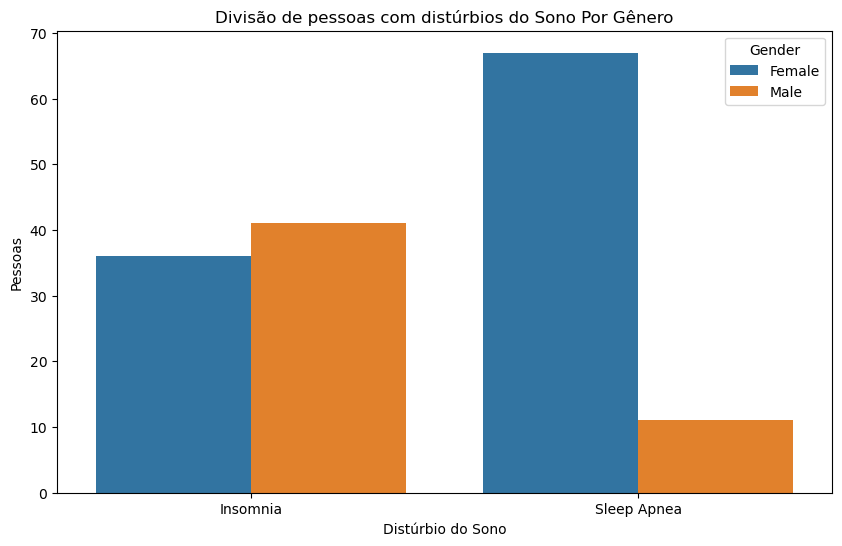

In [241]:
# Visualizar os dados agrupados usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep Disorder', y='Amount', hue='Gender', data=count_by_gender_disorder)
plt.title('Divisão de pessoas com distúrbios do Sono Por Gênero')
plt.xlabel('Distúrbio do Sono')
plt.ylabel('Pessoas')
plt.show()

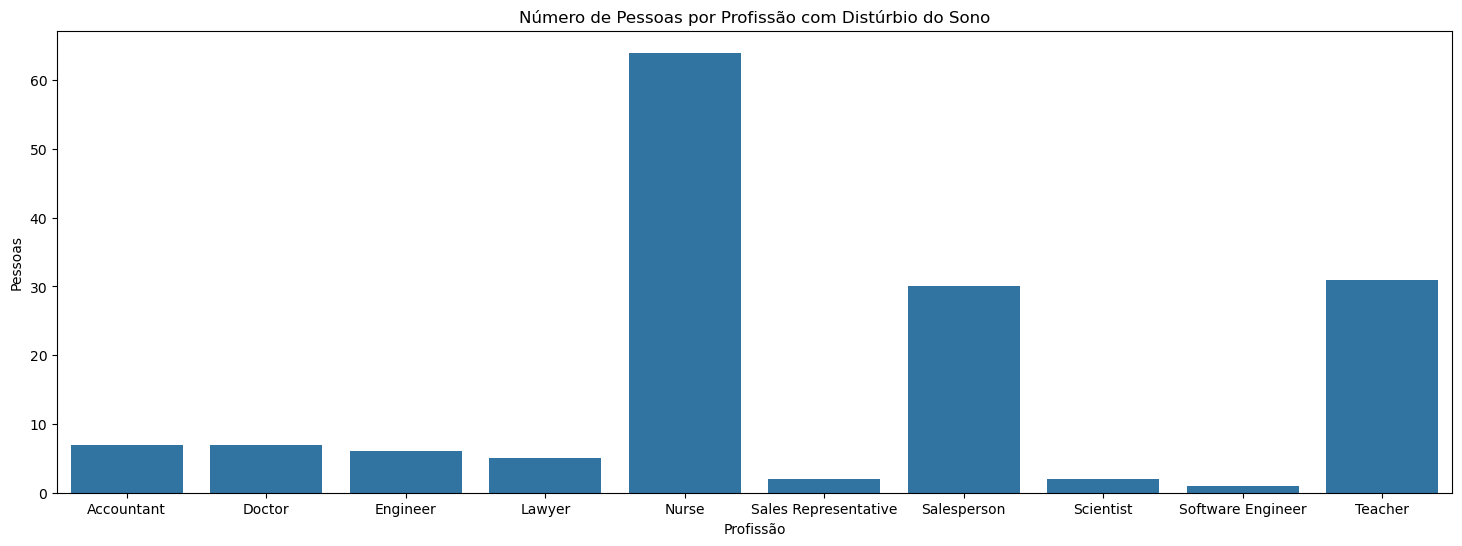

In [243]:
# Agrupar por 'Occupation' e contar o número de ocorrências
count_by_occupation = df_disorder.groupby('Occupation').size().reset_index(name='Count')

# Visualizar os dados agrupados usando seaborn
plt.figure(figsize=(18, 6))
sns.barplot(x='Occupation', y='Count', data=count_by_occupation)
plt.title('Número de Pessoas por Profissão com Distúrbio do Sono')
plt.xlabel('Profissão')
plt.ylabel('Pessoas')
plt.show()

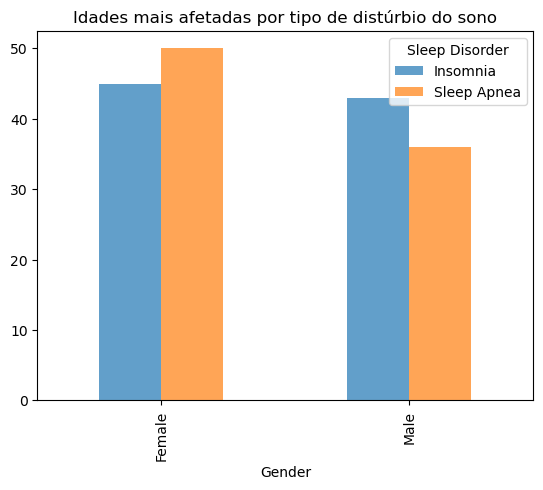

In [245]:
df_disorder.pivot_table(index='Gender',columns='Sleep Disorder',values='Age',aggfunc='median').plot(kind='bar',
                                                                                                   title='Idades mais afetadas por tipo de distúrbio do sono',
                                                                                                    label='Age',alpha=.7)
plt.show()